Danielle Paes Barretto

**version: 30/07/19 (last review)**

EDA levels: participant, playlist, flow.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
folder_data_processed = "./data/DATA_USER_EXPERIMENT/data_processed/"

# Participant level

In [3]:
df_participants = pd.read_csv(folder_data_processed+"participant_level_2019-07-04.csv")
df_participants.head()

,participant_id,1st_playlist,2nd_playlist,3rd_playlist,age,gender,hours_spotify,hours_spotify_coded,most_enjoyable_playlist,msi_F1,...,msi_F5,msi_FG,SUM_msi,extraversion,agreeableness,conscientiousness,neuroticism,openness,companionship,investment
0,3,low_mood_low_tempo_not_extr,low_mood_high_tempo_not_extr,high_mood_low_tempo_not_extr,43,1,0,-3,low_mood_high_tempo_not_extr,32,...,13,49,173,3.25,4.25,2.50,1.25,3.50,-7.889386,2.798592
1,4,low_mood_low_tempo_not_extr,high_mood_low_tempo_not_extr,low_mood_high_tempo_not_extr,42,1,1,-2,low_mood_high_tempo_not_extr,25,...,13,42,164,3.75,4.25,4.50,2.00,2.50,-3.626724,2.923415
2,5,low_mood_high_tempo_extr,low_mood_low_tempo_extr,high_mood_low_tempo_extr,24,1,10,0,low_mood_low_tempo_extr,13,...,22,37,148,3.25,4.00,3.25,1.75,3.00,-2.392633,-1.301776
3,6,low_mood_low_tempo_extr,low_mood_high_tempo_extr,high_mood_low_tempo_extr,23,1,20,2,low_mood_high_tempo_extr,33,...,25,48,189,4.25,4.25,5.00,3.50,2.75,-4.926660,3.113722
4,8,low_mood_high_tempo_not_extr,low_mood_low_tempo_not_extr,high_mood_low_tempo_not_extr,16,0,10,0,low_mood_low_tempo_not_extr,35,...,24,59,204,1.75,4.00,4.50,2.25,4.00,-9.166648,4.483528


In [4]:
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 23 columns):
participant_id             35 non-null int64
1st_playlist               35 non-null object
2nd_playlist               35 non-null object
3rd_playlist               35 non-null object
age                        35 non-null int64
gender                     35 non-null int64
hours_spotify              35 non-null int64
hours_spotify_coded        35 non-null int64
most_enjoyable_playlist    35 non-null object
msi_F1                     35 non-null int64
msi_F2                     35 non-null int64
msi_F3                     35 non-null int64
msi_F4                     35 non-null int64
msi_F5                     35 non-null int64
msi_FG                     35 non-null int64
SUM_msi                    35 non-null int64
extraversion               35 non-null float64
agreeableness              35 non-null float64
conscientiousness          35 non-null float64
neuroticism                35 no

In [5]:
df_participants.columns

Index(['participant_id', '1st_playlist', '2nd_playlist', '3rd_playlist', 'age',
       'gender', 'hours_spotify', 'hours_spotify_coded',
       'most_enjoyable_playlist', 'msi_F1', 'msi_F2', 'msi_F3', 'msi_F4',
       'msi_F5', 'msi_FG', 'SUM_msi', 'extraversion', 'agreeableness',
       'conscientiousness', 'neuroticism', 'openness', 'companionship',
       'investment'],
      dtype='object')

## Inserting categorical variables

In [6]:
df_describe = df_participants[['age','gender','hours_spotify','SUM_msi', 'extraversion', 'agreeableness',
       'conscientiousness', 'neuroticism', 'openness', 'companionship',
       'investment']].describe()

df_describe

,age,gender,hours_spotify,SUM_msi,extraversion,agreeableness,conscientiousness,neuroticism,openness,companionship,investment
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,32.057143,0.571429,7.628571,204.228571,3.250000,3.950000,3.492857,2.585714,3.585714,-5.516844,1.736891
std,14.424128,0.502096,8.881858,29.249521,0.790569,0.658094,0.924514,0.621144,0.769221,2.318698,1.812377
min,13.000000,0.000000,0.000000,136.000000,1.750000,2.250000,1.250000,1.250000,2.000000,-10.764599,-2.564639
25%,21.000000,0.000000,0.000000,186.000000,2.625000,3.500000,2.750000,2.250000,3.125000,-7.245107,0.566310
50%,25.000000,1.000000,5.000000,204.000000,3.250000,4.000000,3.500000,2.500000,3.500000,-5.687386,1.910600
75%,46.000000,1.000000,10.000000,224.000000,4.000000,4.375000,4.250000,3.000000,4.000000,-3.526547,3.132319
max,62.000000,1.000000,40.000000,268.000000,4.500000,5.000000,5.000000,3.750000,5.000000,-1.779213,4.488045


In [7]:
def coding_variables_25_75(row, column_name):
    if row < df_describe[column_name]['25%']:
        return 'low'
    elif row > df_describe[column_name]['75%']:
        return'high'
    else: return 'medium'


def coding_variables_50_75(row, column_name):
    if row < df_describe[column_name]['50%']:
        return 'low'
    elif row > df_describe[column_name]['75%']:
        return'high'
    else: return 'medium'

In [8]:
# gender is recoded in male and female

df_participants['gender_coded'] = df_participants['gender'].apply(lambda x: 'male' if x==0 else 'female')

# age is divided in two groups: under the median : 'low', above : 'high'

df_participants['age_coded'] = df_participants['age'].apply(lambda x: 'low' if x<=df_describe['age']['50%'] else 'high')

# variables coded as 'low' under the 1st quartile, 'medium' between the 1st and the 3rd, and 'high' above the 3rd quartile

list_variable_25_75 = ['SUM_msi', 'extraversion', 'agreeableness',
       'conscientiousness', 'neuroticism', 'openness', 'companionship',
       'investment']

for variable in list_variable_25_75:
    df_participants[variable+'_coded']=df_participants[variable].apply(lambda row: coding_variables_25_75(row,variable))

# rename 'hours_spotify_coded' 

df_participants.rename(columns = {'hours_spotify_coded':'hours_spotify_coded_7_scale'},inplace = True)

# code hours spotify using median and 3rd quartile as boundaries

df_participants['hours_spotify_coded']=df_participants['hours_spotify'].apply(lambda row: coding_variables_50_75(row,'hours_spotify'))

In [9]:
# Insert column indicating level of extreme in case we want to analyze the groups of participants that evaluated different 
# levels of variation

def new_columns_level_extreme(row):
    """ function to create column with 'not_extreme' when high uses boundaries between 20% and 50% percentaile and
    'extreme otherwise """
    
    row.split('_')[-2]
    if 'not'in row:
        return 'not_extreme'
    else:
        return 'extreme'
    
df_participants['level_extreme']=df_participants['most_enjoyable_playlist'].apply(lambda row: new_columns_level_extreme(row))

In [10]:
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 35 columns):
participant_id                 35 non-null int64
1st_playlist                   35 non-null object
2nd_playlist                   35 non-null object
3rd_playlist                   35 non-null object
age                            35 non-null int64
gender                         35 non-null int64
hours_spotify                  35 non-null int64
hours_spotify_coded_7_scale    35 non-null int64
most_enjoyable_playlist        35 non-null object
msi_F1                         35 non-null int64
msi_F2                         35 non-null int64
msi_F3                         35 non-null int64
msi_F4                         35 non-null int64
msi_F5                         35 non-null int64
msi_FG                         35 non-null int64
SUM_msi                        35 non-null int64
extraversion                   35 non-null float64
agreeableness                  35 non-null float64
conscie

[Text(0,0,'0'),
 Text(0,0,'1-3'),
 Text(0,0,'4-6'),
 Text(0,0,'7-10'),
 Text(0,0,'11-15'),
 Text(0,0,'16-20'),
 Text(0,0,'> 21')]

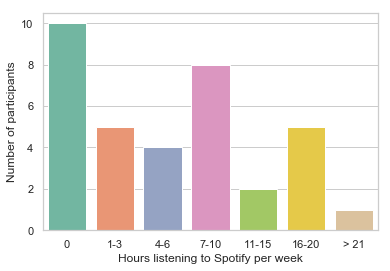

In [11]:
ax = sns.countplot(x='hours_spotify_coded_7_scale', data = df_participants,order = [-3, -2, -1, 0, 1,2,3], palette="Set2")
plt.xlabel("Hours listening to Spotify per week")
plt.ylabel("Number of participants")
ax.set_xticklabels(['0','1-3','4-6', '7-10','11-15','16-20','> 21'])

Text(6.8,0.5,'Mini-IPIP score')

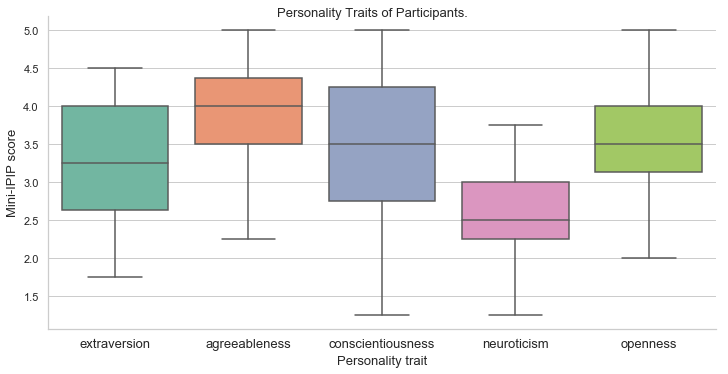

In [16]:
ax = sns.catplot(data=df_participants[['extraversion', 'agreeableness',
       'conscientiousness', 'neuroticism', 'openness']], orient="v", kind = "box", palette="Set2",height = 5, aspect = 2)    

ax.fig.suptitle("Personality Traits of Participants.", size = 13)
ax.set_xticklabels(fontsize = 13)
plt.xlabel("Personality trait", fontsize = 13)
plt.ylabel("Mini-IPIP score", fontsize = 13)


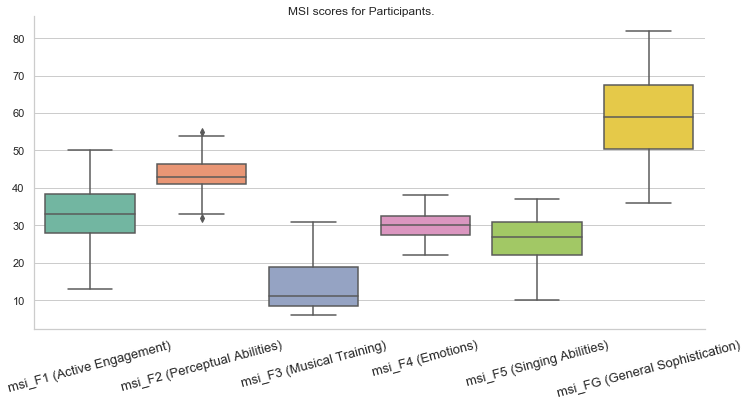

In [18]:
ax = sns.catplot(data=df_participants[['msi_F1', 'msi_F2', 'msi_F3', 'msi_F4',
       'msi_F5', 'msi_FG']], orient="v", kind = "box", palette="Set2",height = 5, aspect = 2)    

ax.fig.suptitle("MSI scores for Participants.")
ax.set_xticklabels(['msi_F1 (Active Engagement)', 'msi_F2 (Perceptual Abilities)', 
                    'msi_F3 (Musical Training)','msi_F4 (Emotions)','msi_F5 (Singing Abilities)',
                    'msi_FG (General Sophistication)'], rotation = 15, fontsize = 13)

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


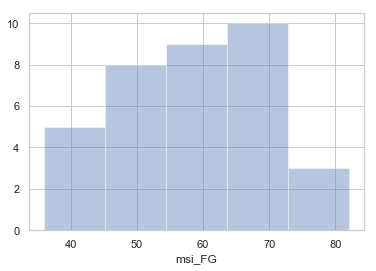

In [14]:
sns.distplot(df_participants.msi_FG, kde=False)

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


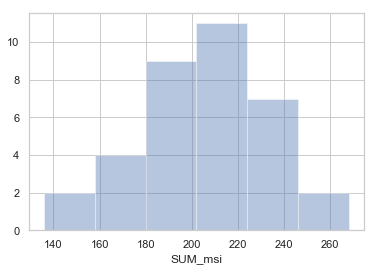

In [15]:
ax=sns.distplot(df_participants.SUM_msi, kde = False)


C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Sum of Music Sophistication Index scores (SUM_msi).')

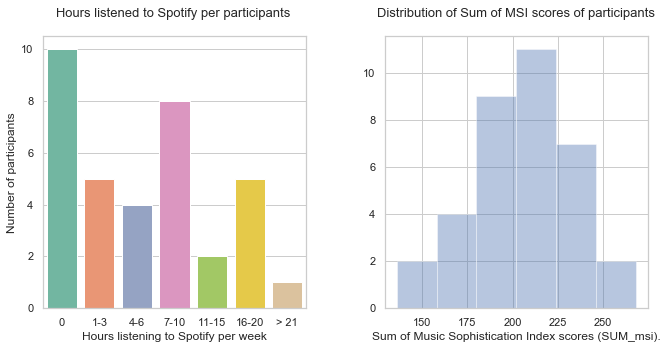

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (12,5))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)

sns.countplot(x='hours_spotify_coded_7_scale', data = df_participants,order = [-3, -2, -1, 0, 1,2,3], palette="Set2",ax=axs[0])
axs[0].set_xticklabels(['0','1-3','4-6', '7-10','11-15','16-20','> 21'])
axs[0].set_xlabel("Hours listening to Spotify per week")
axs[0].set_ylabel("Number of participants")
axs[0].set_title("Hours listened to Spotify per participants \n", size = 13)

sns.distplot(df_participants.SUM_msi, kde = False, ax=axs[1])
axs[1].set_title("Distribution of Sum of MSI scores of participants\n", size = 13)
axs[1].set_xlabel("Sum of Music Sophistication Index scores (SUM_msi).")

Text(0.5,0.98,'Persona Profile for Participants.')

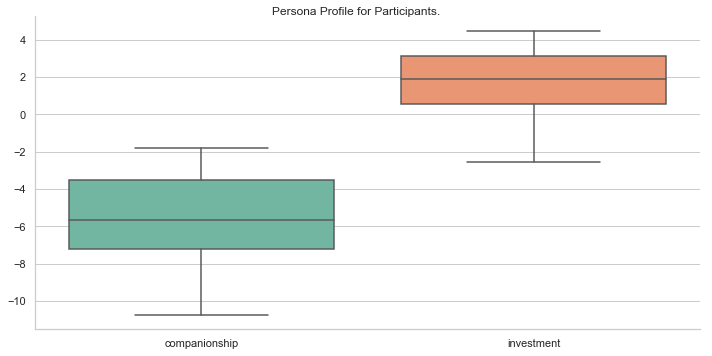

In [17]:
ax = sns.catplot(data=df_participants[['companionship','investment']], orient="v", kind = "box", palette="Set2",height = 5, aspect = 2)    

ax.fig.suptitle("Persona Profile for Participants.")


C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


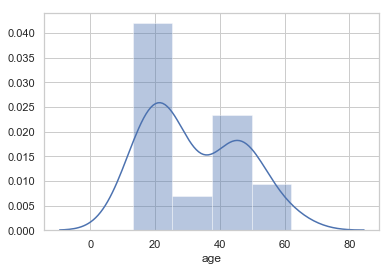

In [18]:
sns.distplot(df_participants.age)

In [19]:
list_playlists = ['low_mood_low_tempo_extr',
                  'low_mood_high_tempo_extr',
                  'high_mood_low_tempo_extr',
                  'low_mood_low_tempo_not_extr',
                  'low_mood_high_tempo_not_extr',
                  'high_mood_low_tempo_not_extr']

<Figure size 2160x1080 with 0 Axes>

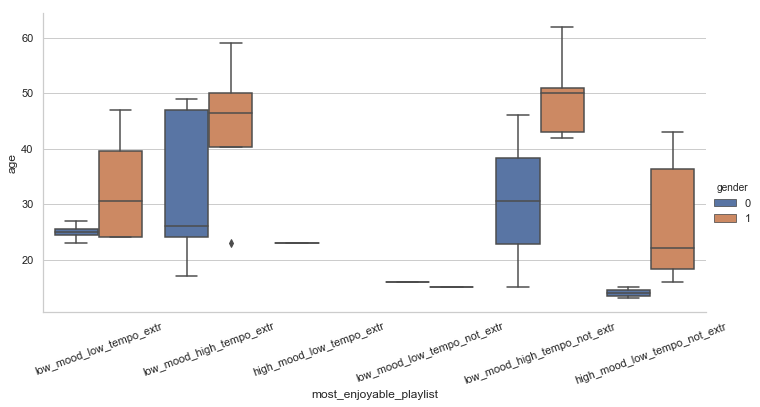

In [20]:
plt.figure(figsize=(30,15))
g=sns.catplot(x="most_enjoyable_playlist", y="age", hue = "gender", kind="box", height = 5, data=df_participants, aspect=2,order = list_playlists)
g.set_xticklabels(rotation=20)

<Figure size 2160x1080 with 0 Axes>

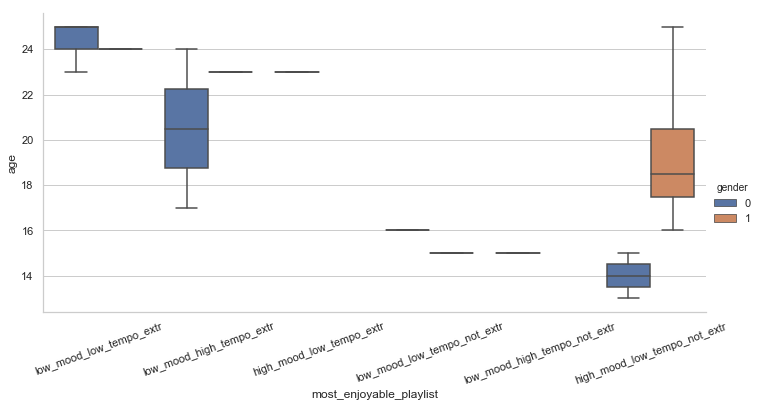

In [21]:
plt.figure(figsize=(30,15))
g=sns.catplot(x="most_enjoyable_playlist", y="age", hue = "gender", kind="box", height = 5, 
              data=df_participants[df_participants.age_coded=='low'], aspect=2,order = list_playlists)
g.set_xticklabels(rotation=20)

<Figure size 2160x1080 with 0 Axes>

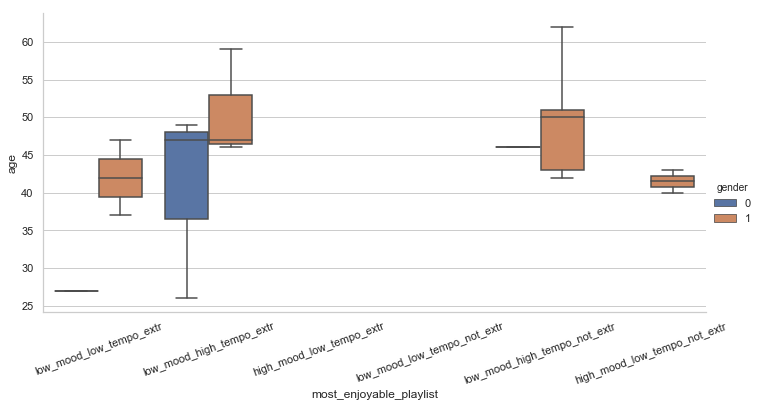

In [22]:
plt.figure(figsize=(30,15))
g=sns.catplot(x="most_enjoyable_playlist", y="age", hue = "gender", kind="box", height = 5, 
              data=df_participants[df_participants.age_coded=='high'], aspect=2,order = list_playlists)
g.set_xticklabels(rotation=20)

In [23]:
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 35 columns):
participant_id                 35 non-null int64
1st_playlist                   35 non-null object
2nd_playlist                   35 non-null object
3rd_playlist                   35 non-null object
age                            35 non-null int64
gender                         35 non-null int64
hours_spotify                  35 non-null int64
hours_spotify_coded_7_scale    35 non-null int64
most_enjoyable_playlist        35 non-null object
msi_F1                         35 non-null int64
msi_F2                         35 non-null int64
msi_F3                         35 non-null int64
msi_F4                         35 non-null int64
msi_F5                         35 non-null int64
msi_FG                         35 non-null int64
SUM_msi                        35 non-null int64
extraversion                   35 non-null float64
agreeableness                  35 non-null float64
conscie

## EDA most enjoyable playlist

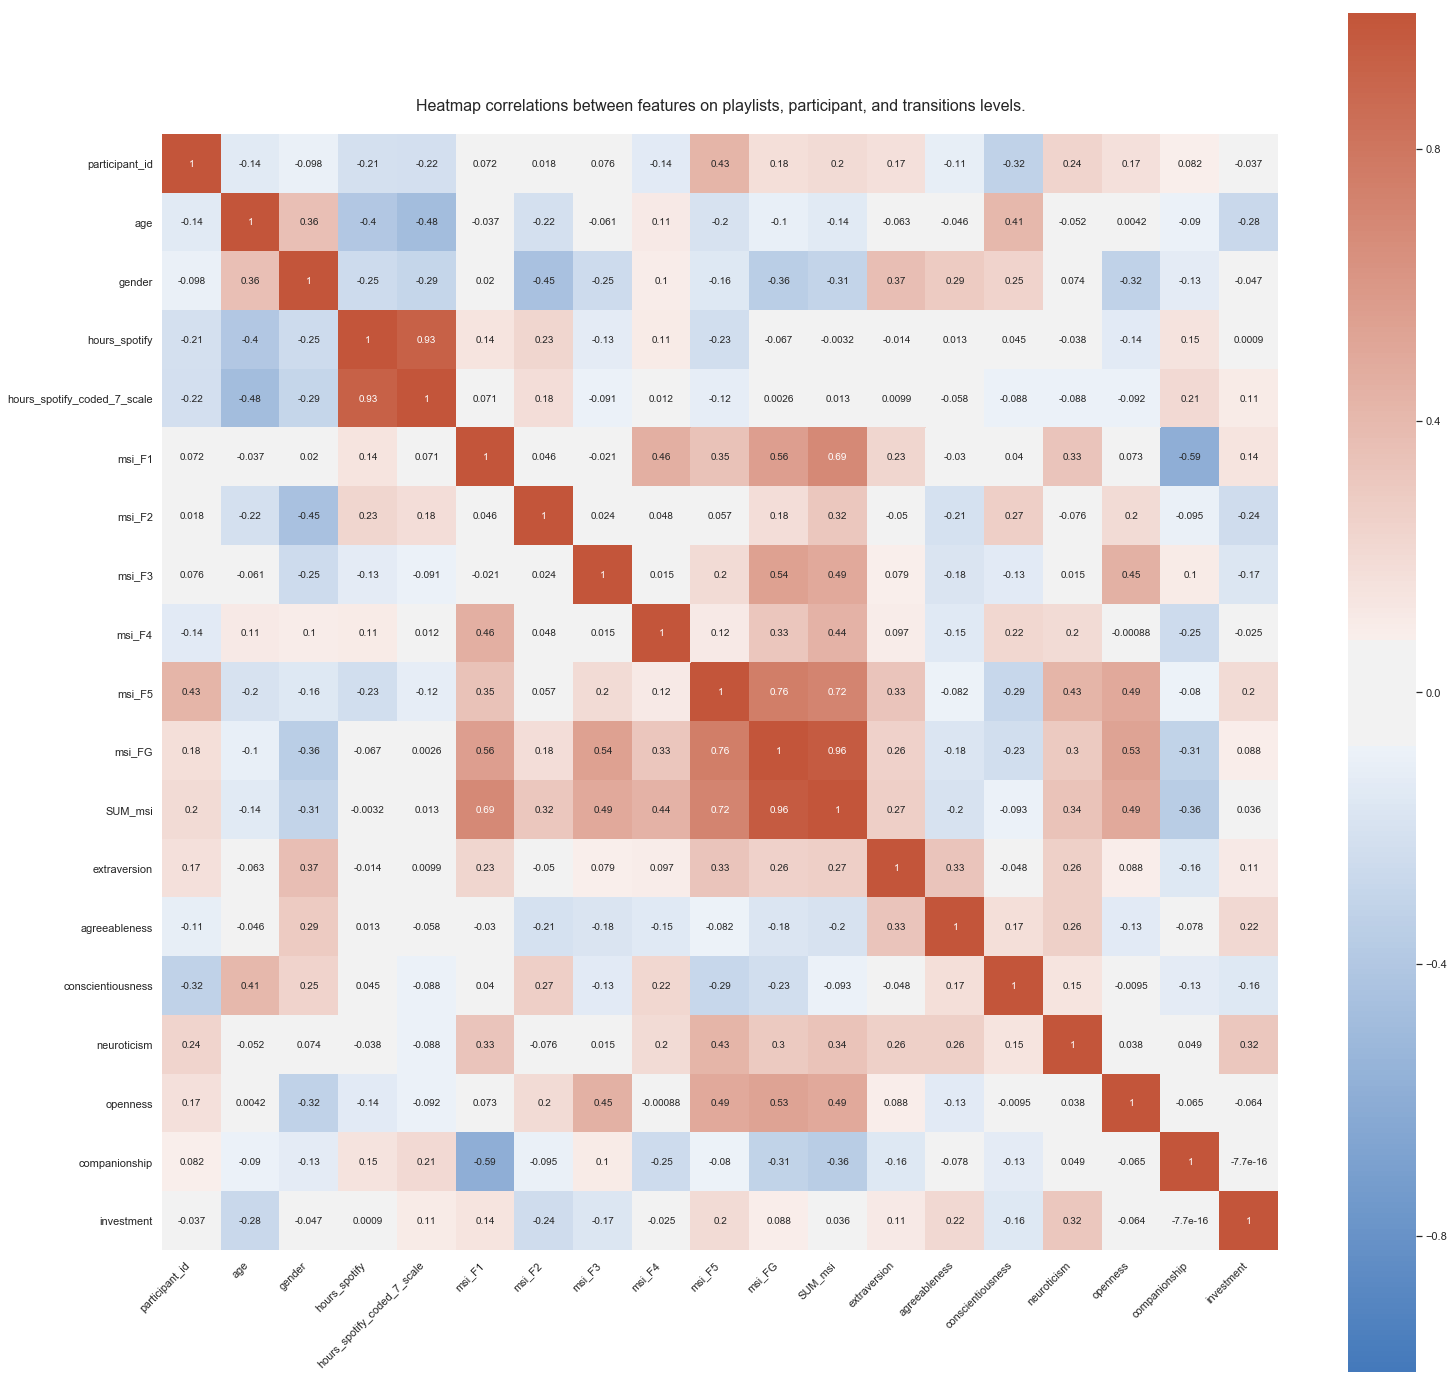

In [24]:
plt.figure(figsize=(25,25))
corr = df_participants.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 20, sep=20, as_cmap=True),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Heatmap correlations between features on playlists, participant, and transitions levels.\n ", fontsize = 16);

In [25]:
# fig, ax = plt.subplots(figsize=(13,5))
# ax = sns.countplot(df_participants.most_enjoyable_playlist,order = list_playlists)
# ax.set_title("Ranking of 'most_enjoyable_playlist'.", size = 14)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
# plt.xlabel("Playlist")
# plt.ylabel("Percentage of votes")

# for p in ax.patches:
#     x=p.get_bbox().get_points()[:,0]
#     y=p.get_bbox().get_points()[1,1]
#     ax.annotate('{:.1f}%'.format(100.*y/len(df_participants)), (x.mean(), y), 
#             ha='center', va='bottom',fontsize=13) # set the alignment of the text

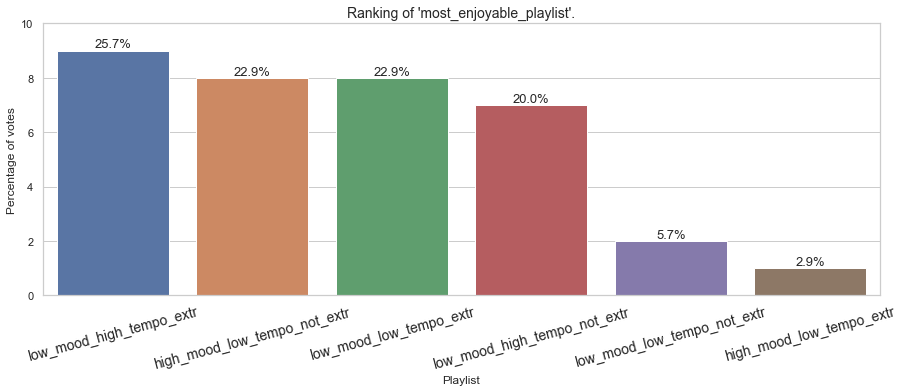

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(df_participants.most_enjoyable_playlist,order = df_participants['most_enjoyable_playlist'].value_counts().index)
ax.set_title("Ranking of 'most_enjoyable_playlist'.", size = 14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, size = 14)
ax.set_ylim(0,10)
plt.xlabel("Playlist")
plt.ylabel("Percentage of votes")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df_participants)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text

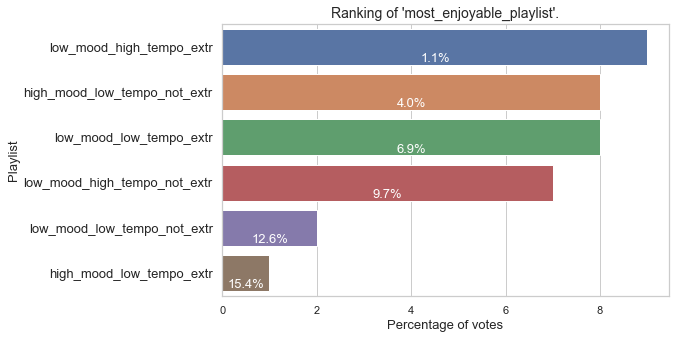

In [76]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(y=df_participants.most_enjoyable_playlist,order = df_participants['most_enjoyable_playlist'].value_counts().index)
ax.set_title("Ranking of 'most_enjoyable_playlist'.", size = 14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 13)
# ax.set_ylim(0,10)
plt.ylabel("Playlist", fontsize = 13)
plt.xlabel("Percentage of votes", fontsize = 13)

for p in ax.patches:
    y=p.get_bbox().get_points()[:,0]
    x=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*x/len(df_participants)), (y.mean(), x), 
            ha='center', va='bottom',fontsize=13, color = "white") # set the alignment of the text

In [28]:
df_participants.level_extreme.unique()

array(['not_extreme', 'extreme'], dtype=object)

In [29]:
df_not_extreme = df_participants[df_participants.level_extreme=='not_extreme']
len(df_not_extreme)

17

In [30]:
df_extreme = df_participants[df_participants.level_extreme=='extreme']
len(df_extreme)

18

In [31]:
list_playlists

['low_mood_low_tempo_extr',
 'low_mood_high_tempo_extr',
 'high_mood_low_tempo_extr',
 'low_mood_low_tempo_not_extr',
 'low_mood_high_tempo_not_extr',
 'high_mood_low_tempo_not_extr']

(0, 9.5)

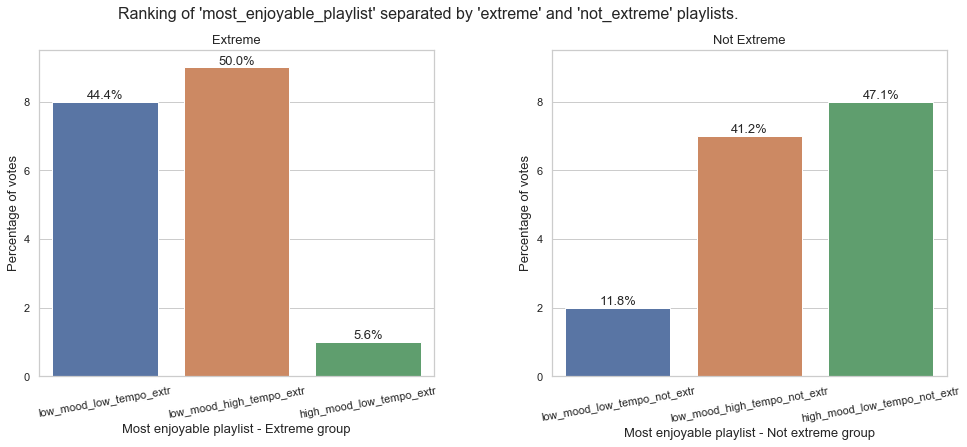

In [100]:
fig, axs = plt.subplots(1, 2, figsize = (18,6))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title   
fig.suptitle("Ranking of 'most_enjoyable_playlist' separated by 'extreme' and 'not_extreme' playlists.",fontsize = 16)

sns.countplot('most_enjoyable_playlist',data = df_extreme, order = ['low_mood_low_tempo_extr', 
                                                                    'low_mood_high_tempo_extr', 
                                                                    'high_mood_low_tempo_extr'],ax = axs[0])

for p in axs[0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axs[0].annotate('{:.1f}%'.format(100.*y/len(df_extreme)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text
    axs[0].set_title("Extreme", size = 13 )

axs[0].set_xlabel("Most enjoyable playlist - Extreme group", size = 13)
axs[0].set_ylabel("Percentage of votes", size = 13)     
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=10)
axs[0].set_ylim(0,9.5)



sns.countplot('most_enjoyable_playlist', data = df_not_extreme,order = ['low_mood_low_tempo_not_extr', 
                                                                        'low_mood_high_tempo_not_extr', 
                                                                        'high_mood_low_tempo_not_extr'], ax = axs[1] )

for p in axs[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axs[1].annotate('{:.1f}%'.format(100.*y/len(df_not_extreme)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text
    axs[1].set_title("Not Extreme", size = 13 )
    
axs[1].set_xlabel("Most enjoyable playlist - Not extreme group", size = 13)
axs[1].set_ylabel("Percentage of votes", size = 13)  
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=10)
axs[1].set_ylim(0,9.5)

    
    
    
    


[Text(0,0,'low_mood_low_tempo_not_extr'),
 Text(0,0,'low_mood_high_tempo_not_extr'),
 Text(0,0,'high_mood_low_tempo_not_extr')]

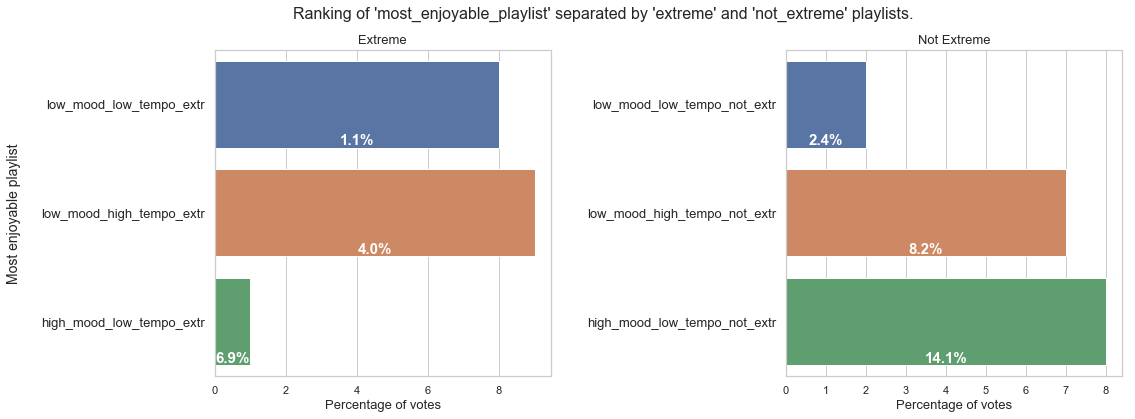

In [138]:
fig, axs = plt.subplots(1, 2, figsize = (18,6))
fig.subplots_adjust(left=0.2, wspace=0.7, hspace = 0.4)
    # title   
fig.suptitle("Ranking of 'most_enjoyable_playlist' separated by 'extreme' and 'not_extreme' playlists.",fontsize = 16)

sns.countplot(y = 'most_enjoyable_playlist',data = df_extreme, order = ['low_mood_low_tempo_extr', 
                                                                    'low_mood_high_tempo_extr', 
                                                                    'high_mood_low_tempo_extr'],ax = axs[0])

for p in axs[0].patches:
    y=p.get_bbox().get_points()[:,0]
    x=p.get_bbox().get_points()[1,1]
    axs[0].annotate('{:.1f}%'.format(100.*x/len(df_participants)), (y.mean(), x), 
            ha='center', va='bottom',fontsize=15, color = "white", fontweight = "bold") # set the alignment of the text
    axs[0].set_title("Extreme", size = 13 )

axs[0].set_ylabel("Most enjoyable playlist\n", size = 14)
axs[0].set_xlabel("Percentage of votes", size = 13)     
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize = 13)
# axs[0].set_ylim(0,9.5)



sns.countplot(y='most_enjoyable_playlist', data = df_not_extreme,order = ['low_mood_low_tempo_not_extr', 
                                                                        'low_mood_high_tempo_not_extr', 
                                                                        'high_mood_low_tempo_not_extr'], ax = axs[1] )

for p in axs[1].patches:
    y=p.get_bbox().get_points()[:,0]
    x=p.get_bbox().get_points()[1,1]
    axs[1].annotate('{:.1f}%'.format(100.*x/len(df_not_extreme)), (y.mean(), x), 
            ha='center', va='bottom',fontsize=15,color = "white", fontweight = "bold") # set the alignment of the text
    axs[1].set_title("Not Extreme", size = 13 )
    
axs[1].set_ylabel("")
axs[1].set_xlabel("Percentage of votes", size = 13)  
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize = 13)
# axs[1].set_ylim(0,9.5)


    
    
    
    


In [19]:
df_flow = pd.read_csv(folder_data_processed+"flow_data_expanded_2019-07-04.csv")
df_flow.head()

,participant_id,transitions,flow_score,playlist,current_track-next_track,current_track,next_track,diff_acousticness,diff_danceability,diff_energy,...,age_coded,SUM_msi_coded,extraversion_coded,agreeableness_coded,conscientiousness_coded,neuroticism_coded,openness_coded,companionship_coded,investment_coded,hours_spotify_coded
0,3,t1_t2,0.75,high_mood_low_tempo_not_extr,2dLxWmivrCHjJbYAkVNFyH_31MkGwj0SWgZaTvEt5Hgxv,2dLxWmivrCHjJbYAkVNFyH,31MkGwj0SWgZaTvEt5Hgxv,0.00950,0.335,0.097,...,high,low,medium,medium,low,low,medium,low,medium,low
1,3,t2_t3,0.75,high_mood_low_tempo_not_extr,31MkGwj0SWgZaTvEt5Hgxv_21bAZmgzIw13tN0rHtMeRq,31MkGwj0SWgZaTvEt5Hgxv,21bAZmgzIw13tN0rHtMeRq,0.32760,0.333,0.061,...,high,low,medium,medium,low,low,medium,low,medium,low
2,3,t3_t4,0.75,high_mood_low_tempo_not_extr,21bAZmgzIw13tN0rHtMeRq_27rdGxbavYJeBphck5MZAF,21bAZmgzIw13tN0rHtMeRq,27rdGxbavYJeBphck5MZAF,0.34313,0.118,0.139,...,high,low,medium,medium,low,low,medium,low,medium,low
3,3,t4_t5,0.75,high_mood_low_tempo_not_extr,27rdGxbavYJeBphck5MZAF_0kHyKhJMukHEPfeh8s7rdM,27rdGxbavYJeBphck5MZAF,0kHyKhJMukHEPfeh8s7rdM,0.29013,0.087,0.106,...,high,low,medium,medium,low,low,medium,low,medium,low
4,3,t5_t6,0.25,high_mood_low_tempo_not_extr,0kHyKhJMukHEPfeh8s7rdM_4AmHBxaNASqpKUp7j69Ucl,0kHyKhJMukHEPfeh8s7rdM,4AmHBxaNASqpKUp7j69Ucl,0.02900,0.013,0.075,...,high,low,medium,medium,low,low,medium,low,medium,low


In [20]:
df_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 57 columns):
participant_id                 945 non-null int64
transitions                    945 non-null object
flow_score                     945 non-null float64
playlist                       945 non-null object
current_track-next_track       945 non-null object
current_track                  945 non-null object
next_track                     945 non-null object
diff_acousticness              945 non-null float64
diff_danceability              945 non-null float64
diff_energy                    945 non-null float64
diff_valence                   945 non-null float64
diff_tempo                     945 non-null float64
diff_instrumentalness          945 non-null float64
diff_key                       945 non-null float64
diff_mode                      945 non-null float64
diff_liveness                  945 non-null float64
diff_loudness                  945 non-null float64
diff_speechiness  

In [30]:
df_mean_flow_conditions = df_flow[['var_mood','var_tempo','level_extreme','flow_score']].groupby(['var_mood','var_tempo','level_extreme']).mean()

In [31]:
df_mean_flow_conditions=df_mean_flow_conditions.reset_index()

In [32]:
df_mean_flow_conditions

,var_mood,var_tempo,level_extreme,participant_id,flow_score
0,high,low,extreme,22.277778,0.338704
1,high,low,not_extreme,26.117647,0.467516
2,low,high,extreme,22.277778,0.559815
3,low,high,not_extreme,26.117647,0.453595
4,low,low,extreme,22.277778,0.496358
5,low,low,not_extreme,26.117647,0.482288


Text(0.675,0.5,'Flow score of transitions in a playlist')

<Figure size 720x360 with 0 Axes>

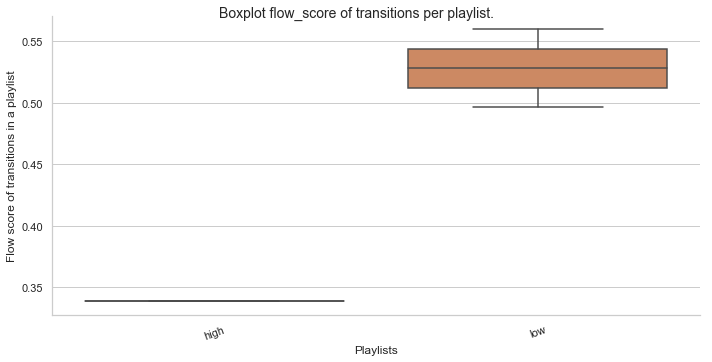

In [29]:
plt.figure(figsize=(10,5))
g = sns.catplot(x="var_mood", y="flow_score", kind="box", height = 5, 
                data=df_mean_flow_conditions[df_mean_flow_conditions.level_extreme=='extreme'], aspect=2)
g.set_xticklabels(rotation=20)
g.fig.suptitle("Boxplot flow_score of transitions per playlist.", fontsize = 14)
plt.xlabel('Playlists')
plt.ylabel('Flow score of transitions in a playlist')

In [35]:
df_playlists = pd.read_csv(folder_data_processed+"participants_playlists_processed_2019-07-04.csv")
df_merged = pd.merge(df_participants,df_playlists,on = 'participant_id')

In [36]:
df_merged_not_extreme = df_merged[df_merged.level_extreme=='not_extreme']
df_merged_extreme = df_merged[df_merged.level_extreme=='extreme']

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Not extreme')

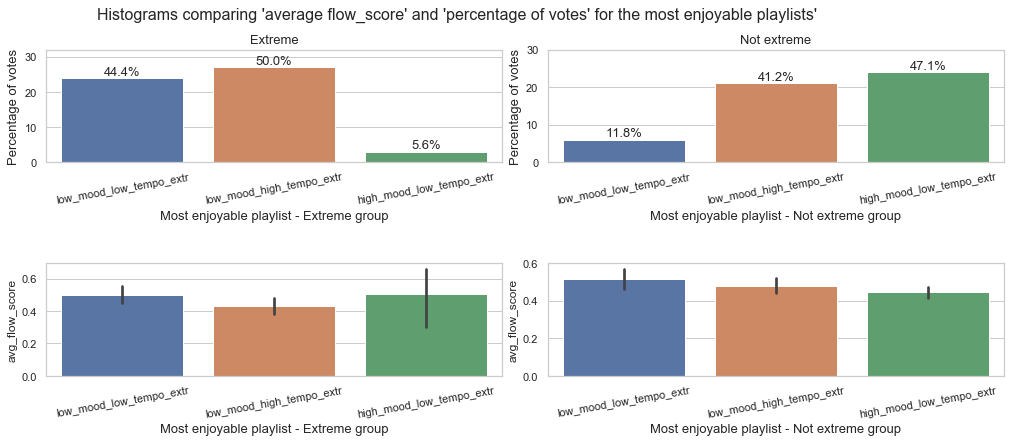

In [37]:
fig, axs = plt.subplots(2, 2, figsize = (19,6))
fig.subplots_adjust(left=0.2, wspace=0.1, hspace = 0.9)
fig.suptitle("Histograms comparing 'average flow_score' and 'percentage of votes' for the most enjoyable playlists'\n",fontsize = 16)

sns.countplot("most_enjoyable_playlist",data = df_merged_extreme,order = ['low_mood_low_tempo_extr',
                                                                             'low_mood_high_tempo_extr', 
                                                                        'high_mood_low_tempo_extr'], ax=axs[0,0])

for p in axs[0,0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axs[0,0].annotate('{:.1f}%'.format(100.*y/len(df_merged_extreme)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text
    
axs[0,0].set_ylim(0, 32)
axs[0,0].set_xlabel("Most enjoyable playlist - Extreme group", size = 13)
axs[0,0].set_ylabel("Percentage of votes", size = 13)     
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=10)


sns.barplot(x = 'most_enjoyable_playlist', y='avg_flow_score', data = df_merged_extreme,
            order = ['low_mood_low_tempo_extr','low_mood_high_tempo_extr','high_mood_low_tempo_extr'], ax=axs[1,0])
axs[1,0].set_xlabel("Most enjoyable playlist - Extreme group", size = 13)
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(), rotation=10)



    
    
sns.countplot("most_enjoyable_playlist",data = df_merged_not_extreme, order = ['low_mood_low_tempo_not_extr',
                                                                           'low_mood_high_tempo_not_extr', 
                                                                        'high_mood_low_tempo_not_extr'], ax=axs[0,1])

for p in axs[0,1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    axs[0,1].annotate('{:.1f}%'.format(100.*y/len(df_merged_not_extreme)), (x.mean(), y), 
            ha='center', va='bottom',fontsize=13) # set the alignment of the text
    
axs[0,1].set_ylim(0, 30)
axs[0,1].set_xlabel("Most enjoyable playlist - Not extreme group", size = 13)
axs[0,1].set_ylabel("Percentage of votes", size = 13)     
axs[0,1].set_xticklabels(axs[0,0].get_xticklabels(), rotation=10)


    
sns.barplot(x = 'most_enjoyable_playlist', y='avg_flow_score', data = df_merged_not_extreme,
            order = ['low_mood_low_tempo_not_extr','low_mood_high_tempo_not_extr','high_mood_low_tempo_not_extr'], ax=axs[1,1])   
axs[1,1].set_xlabel("Most enjoyable playlist - Not extreme group", size = 13)
axs[1,1].set_xticklabels(axs[1,0].get_xticklabels(), rotation=10)


axs[0,0].set_title("Extreme", size = 13 )
axs[0,1].set_title("Not extreme", size = 13 )


In [38]:
ranking_most_enj = df_participants['most_enjoyable_playlist'].value_counts().index.tolist()

# Playlist level

In [40]:
df_playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
participant_id             105 non-null int64
playlist                   105 non-null object
avg_flow_score             105 non-null float64
is_track_known             105 non-null int64
is_participant_favorite    105 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [41]:
df_score_favorite = df_playlists[df_playlists.is_participant_favorite==1]

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average flow score of the playlist')

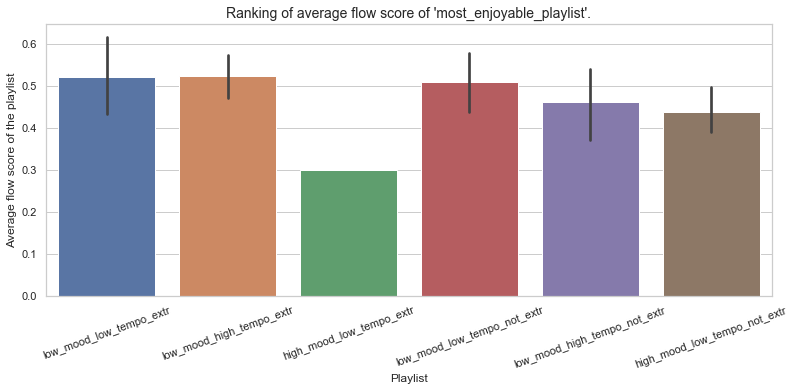

In [42]:
plt.figure(figsize=(13,5))
ax = sns.barplot(x='playlist', y='avg_flow_score', data = df_score_favorite, order = list_playlists)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.set_title("Ranking of average flow score of 'most_enjoyable_playlist'.", size = 14)
plt.xlabel("Playlist")
plt.ylabel("Average flow score of the playlist")

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Average flow score of the playlist')

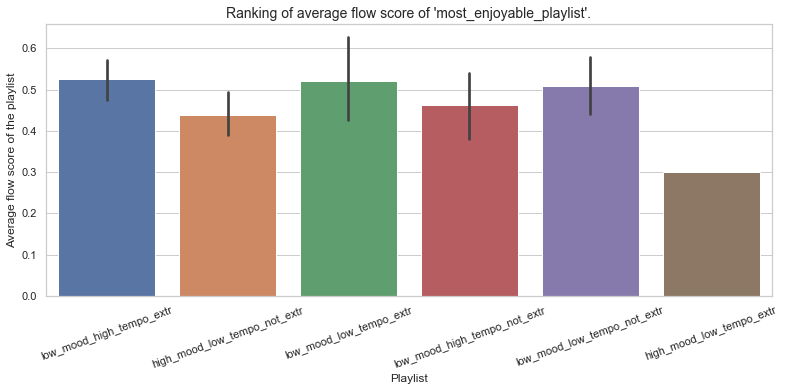

In [43]:
plt.figure(figsize=(13,5))
ax = sns.barplot(x='playlist', y='avg_flow_score', data = df_score_favorite, order = ranking_most_enj)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
ax.set_title("Ranking of average flow score of 'most_enjoyable_playlist'.", size = 14)
plt.xlabel("Playlist")
plt.ylabel("Average flow score of the playlist")

## Average flow score per playlist

In [45]:
list_playlists=df_playlists.playlist.value_counts().index.tolist()

list_playlists

['low_mood_low_tempo_extr',
 'high_mood_low_tempo_extr',
 'low_mood_high_tempo_extr',
 'low_mood_high_tempo_not_extr',
 'high_mood_low_tempo_not_extr',
 'low_mood_low_tempo_not_extr']

In [46]:
df_playlists.participant_id = df_playlists.participant_id.astype('str')

In [47]:
df_playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
participant_id             105 non-null object
playlist                   105 non-null object
avg_flow_score             105 non-null float64
is_track_known             105 non-null int64
is_participant_favorite    105 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


# EDA flow

In [50]:
df_flow = pd.read_csv(folder_data_processed+"flow_data_expanded_2019-07-04.csv")

In [51]:
df_flow.head()

,participant_id,transitions,flow_score,playlist,current_track-next_track,current_track,next_track,diff_acousticness,diff_danceability,diff_energy,...,age_coded,SUM_msi_coded,extraversion_coded,agreeableness_coded,conscientiousness_coded,neuroticism_coded,openness_coded,companionship_coded,investment_coded,hours_spotify_coded
0,3,t1_t2,0.75,high_mood_low_tempo_not_extr,2dLxWmivrCHjJbYAkVNFyH_31MkGwj0SWgZaTvEt5Hgxv,2dLxWmivrCHjJbYAkVNFyH,31MkGwj0SWgZaTvEt5Hgxv,0.00950,0.335,0.097,...,high,low,medium,medium,low,low,medium,low,medium,low
1,3,t2_t3,0.75,high_mood_low_tempo_not_extr,31MkGwj0SWgZaTvEt5Hgxv_21bAZmgzIw13tN0rHtMeRq,31MkGwj0SWgZaTvEt5Hgxv,21bAZmgzIw13tN0rHtMeRq,0.32760,0.333,0.061,...,high,low,medium,medium,low,low,medium,low,medium,low
2,3,t3_t4,0.75,high_mood_low_tempo_not_extr,21bAZmgzIw13tN0rHtMeRq_27rdGxbavYJeBphck5MZAF,21bAZmgzIw13tN0rHtMeRq,27rdGxbavYJeBphck5MZAF,0.34313,0.118,0.139,...,high,low,medium,medium,low,low,medium,low,medium,low
3,3,t4_t5,0.75,high_mood_low_tempo_not_extr,27rdGxbavYJeBphck5MZAF_0kHyKhJMukHEPfeh8s7rdM,27rdGxbavYJeBphck5MZAF,0kHyKhJMukHEPfeh8s7rdM,0.29013,0.087,0.106,...,high,low,medium,medium,low,low,medium,low,medium,low
4,3,t5_t6,0.25,high_mood_low_tempo_not_extr,0kHyKhJMukHEPfeh8s7rdM_4AmHBxaNASqpKUp7j69Ucl,0kHyKhJMukHEPfeh8s7rdM,4AmHBxaNASqpKUp7j69Ucl,0.02900,0.013,0.075,...,high,low,medium,medium,low,low,medium,low,medium,low


## Districution of flow scores of each transition in a playlist

In [52]:
list_playlists = ['low_mood_low_tempo_extr',
                  'low_mood_high_tempo_extr',
                  'high_mood_low_tempo_extr',
                  'low_mood_low_tempo_not_extr',
                  'low_mood_high_tempo_not_extr',
                  'high_mood_low_tempo_not_extr']

In [53]:
df_flow[df_flow['playlist']==list_playlists[0]]

,participant_id,transitions,flow_score,playlist,current_track-next_track,current_track,next_track,diff_acousticness,diff_danceability,diff_energy,...,age_coded,SUM_msi_coded,extraversion_coded,agreeableness_coded,conscientiousness_coded,neuroticism_coded,openness_coded,companionship_coded,investment_coded,hours_spotify_coded
72,5,t1_t2,0.08,low_mood_low_tempo_extr,4vmgP10TH0YYqJkzr8yLW0_14sOS5L36385FJ3OL8hew4,4vmgP10TH0YYqJkzr8yLW0,14sOS5L36385FJ3OL8hew4,0.3637,0.061,0.011,...,low,low,medium,medium,medium,low,medium,high,low,medium
73,5,t2_t3,0.92,low_mood_low_tempo_extr,14sOS5L36385FJ3OL8hew4_2Fap2zMMINCLylSCSGQLEa,14sOS5L36385FJ3OL8hew4,2Fap2zMMINCLylSCSGQLEa,0.1640,0.010,0.023,...,low,low,medium,medium,medium,low,medium,high,low,medium
74,5,t3_t4,0.58,low_mood_low_tempo_extr,2Fap2zMMINCLylSCSGQLEa_1ymEwygMMg5JwVAnh3C7yY,2Fap2zMMINCLylSCSGQLEa,1ymEwygMMg5JwVAnh3C7yY,0.1060,0.088,0.023,...,low,low,medium,medium,medium,low,medium,high,low,medium
75,5,t4_t5,0.58,low_mood_low_tempo_extr,1ymEwygMMg5JwVAnh3C7yY_60Q0ZSKKBea7otGijFgrQI,1ymEwygMMg5JwVAnh3C7yY,60Q0ZSKKBea7otGijFgrQI,0.1610,0.059,0.021,...,low,low,medium,medium,medium,low,medium,high,low,medium
76,5,t5_t6,0.67,low_mood_low_tempo_extr,60Q0ZSKKBea7otGijFgrQI_7tsHqxfepei1AdLjy93XIv,60Q0ZSKKBea7otGijFgrQI,7tsHqxfepei1AdLjy93XIv,0.1950,0.073,0.023,...,low,low,medium,medium,medium,low,medium,high,low,medium
77,5,t6_t7,0.25,low_mood_low_tempo_extr,7tsHqxfepei1AdLjy93XIv_1eN1K7YPRButXU7Mq0V58N,7tsHqxfepei1AdLjy93XIv,1eN1K7YPRButXU7Mq0V58N,0.2638,0.183,0.044,...,low,low,medium,medium,medium,low,medium,high,low,medium
78,5,t7_t8,0.08,low_mood_low_tempo_extr,1eN1K7YPRButXU7Mq0V58N_6uaIMhUZXMuT2Zz0vxrFiR,1eN1K7YPRButXU7Mq0V58N,6uaIMhUZXMuT2Zz0vxrFiR,0.7038,0.251,0.017,...,low,low,medium,medium,medium,low,medium,high,low,medium
79,5,t8_t9,0.50,low_mood_low_tempo_extr,6uaIMhUZXMuT2Zz0vxrFiR_56ev0yPeYbMzfrGCfS2KCr,6uaIMhUZXMuT2Zz0vxrFiR,56ev0yPeYbMzfrGCfS2KCr,0.3060,0.002,0.047,...,low,low,medium,medium,medium,low,medium,high,low,medium
80,5,t9_t10,0.42,low_mood_low_tempo_extr,56ev0yPeYbMzfrGCfS2KCr_7Aw2zBxuyMrrPuxugAcZwr,56ev0yPeYbMzfrGCfS2KCr,7Aw2zBxuyMrrPuxugAcZwr,0.2840,0.204,0.035,...,low,low,medium,medium,medium,low,medium,high,low,medium
99,6,t1_t2,0.25,low_mood_low_tempo_extr,4vmgP10TH0YYqJkzr8yLW0_14sOS5L36385FJ3OL8hew4,4vmgP10TH0YYqJkzr8yLW0,14sOS5L36385FJ3OL8hew4,0.3637,0.061,0.011,...,low,medium,high,medium,high,high,low,medium,medium,high


C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Playlist high_mood_low_tempo_not_extr')

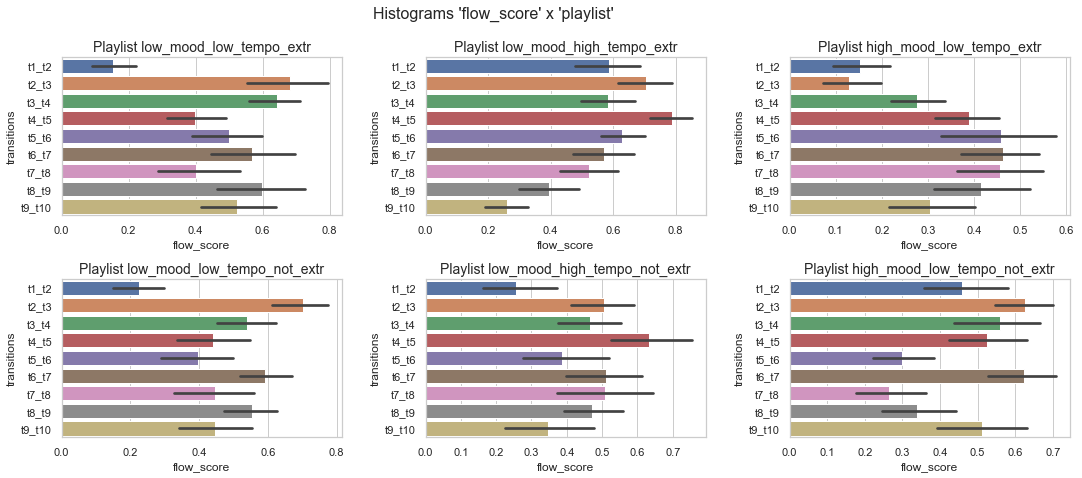

In [54]:
fig, axs = plt.subplots(2, 3, figsize = (20,7))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title   
fig.suptitle("Histograms 'flow_score' x 'playlist'",fontsize = 16)
sns.barplot(x = 'flow_score', y = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[0]], ax=axs[0,0])
axs[0,0].set_title("Playlist "+list_playlists[0],fontsize = 14 )

sns.barplot(x = 'flow_score', y = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[1]], ax=axs[0,1])
axs[0,1].set_title("Playlist "+list_playlists[1],fontsize = 14 )

sns.barplot(x = 'flow_score', y = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[2]], ax=axs[0,2])
axs[0,2].set_title("Playlist "+list_playlists[2],fontsize = 14 )

sns.barplot(x = 'flow_score', y = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[3]], ax=axs[1,0])
axs[1,0].set_title("Playlist "+list_playlists[3],fontsize = 14 )

sns.barplot(x = 'flow_score', y = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[4]], ax=axs[1,1])
axs[1,1].set_title("Playlist "+list_playlists[4],fontsize = 14 )

sns.barplot(x = 'flow_score', y = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[5]], ax=axs[1,2])
axs[1,2].set_title("Playlist "+list_playlists[5],fontsize = 14 )

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


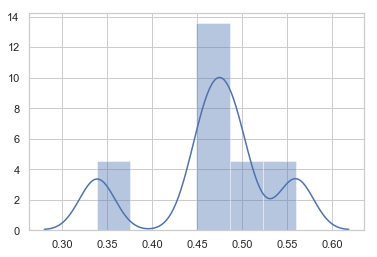

In [55]:
sns.distplot(df_flow[['playlist','flow_score']].groupby('playlist').mean())

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Playlist high_mood_low_tempo_not_extr')

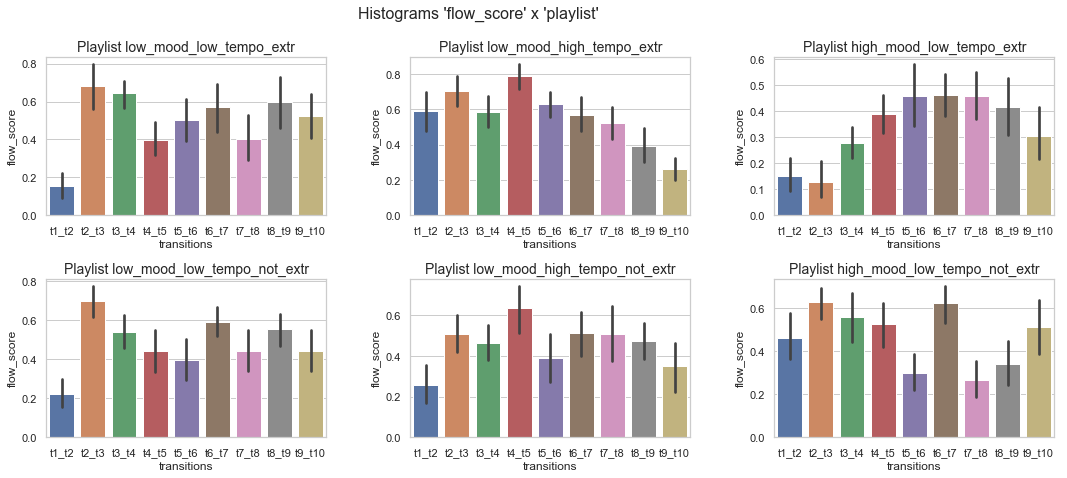

In [56]:
fig, axs = plt.subplots(2, 3, figsize = (20,7))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title   
fig.suptitle("Histograms 'flow_score' x 'playlist'",fontsize = 16)
sns.barplot(y = 'flow_score', x = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[0]], ax=axs[0,0])
axs[0,0].set_title("Playlist "+list_playlists[0],fontsize = 14 )

sns.barplot(y = 'flow_score', x = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[1]], ax=axs[0,1])
axs[0,1].set_title("Playlist "+list_playlists[1],fontsize = 14 )

sns.barplot(y = 'flow_score', x = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[2]], ax=axs[0,2])
axs[0,2].set_title("Playlist "+list_playlists[2],fontsize = 14 )

sns.barplot(y = 'flow_score', x = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[3]], ax=axs[1,0])
axs[1,0].set_title("Playlist "+list_playlists[3],fontsize = 14 )

sns.barplot(y = 'flow_score', x = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[4]], ax=axs[1,1])
axs[1,1].set_title("Playlist "+list_playlists[4],fontsize = 14 )

sns.barplot(y = 'flow_score', x = 'transitions', data = df_flow[df_flow['playlist']==list_playlists[5]], ax=axs[1,2])
axs[1,2].set_title("Playlist "+list_playlists[5],fontsize = 14 )

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Playlist high_mood_low_tempo_not_extr')

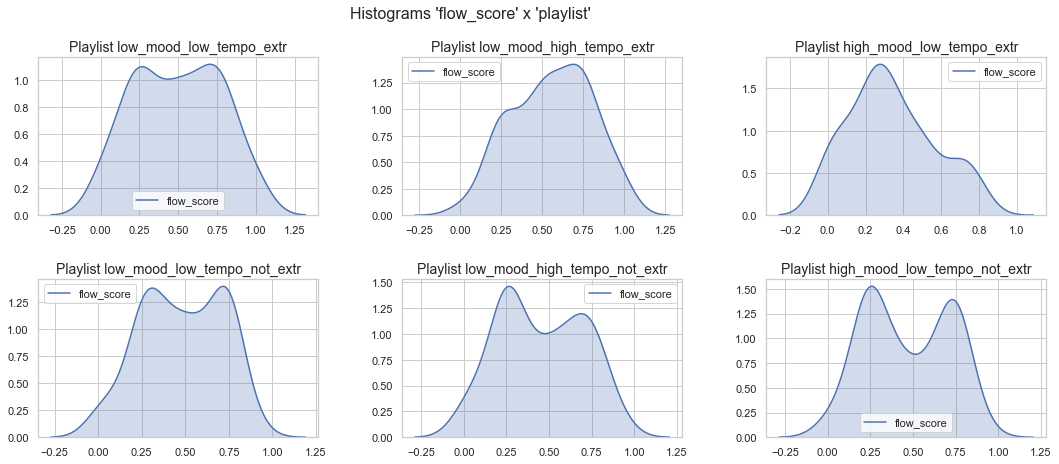

In [57]:
fig, axs = plt.subplots(2, 3, figsize = (20,7))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title   
fig.suptitle("Histograms 'flow_score' x 'playlist'",fontsize = 16)
sns.kdeplot(df_flow[df_flow['playlist']==list_playlists[0]]['flow_score'],shade = True, ax=axs[0,0])
axs[0,0].set_title("Playlist "+list_playlists[0],fontsize = 14 )

sns.kdeplot(df_flow[df_flow['playlist']==list_playlists[1]]['flow_score'],shade = True, ax=axs[0,1])
axs[0,1].set_title("Playlist "+list_playlists[1],fontsize = 14 )

sns.kdeplot(df_flow[df_flow['playlist']==list_playlists[2]]['flow_score'],shade = True, ax=axs[0,2])
axs[0,2].set_title("Playlist "+list_playlists[2],fontsize = 14 )

sns.kdeplot(df_flow[df_flow['playlist']==list_playlists[3]]['flow_score'],shade = True, ax=axs[1,0])
axs[1,0].set_title("Playlist "+list_playlists[3],fontsize = 14 )

sns.kdeplot(df_flow[df_flow['playlist']==list_playlists[4]]['flow_score'],shade = True, ax=axs[1,1])
axs[1,1].set_title("Playlist "+list_playlists[4],fontsize = 14 )

sns.kdeplot(df_flow[df_flow['playlist']==list_playlists[5]]['flow_score'],shade = True, ax=axs[1,2])
axs[1,2].set_title("Playlist "+list_playlists[5],fontsize = 14 )

Text(0.5,1,'Playlist high_mood_low_tempo_not_extr')

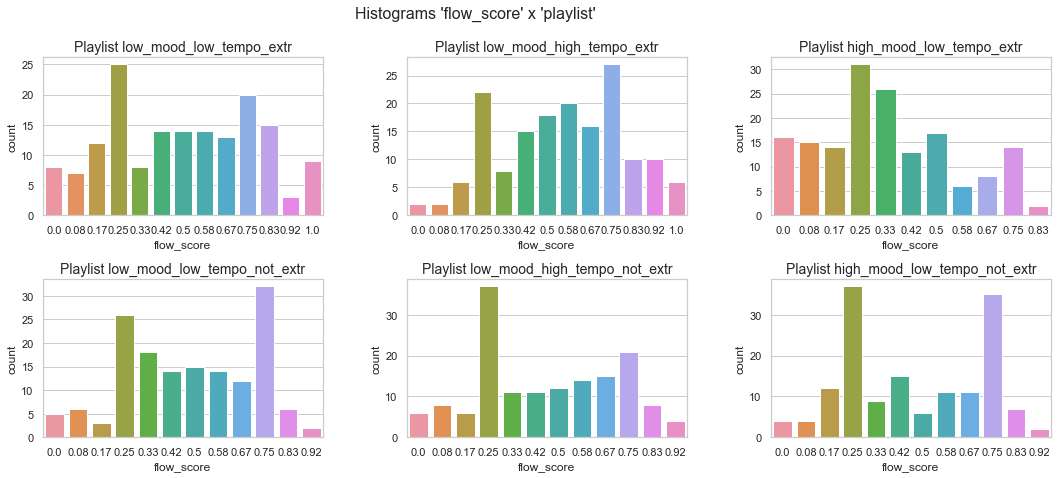

In [59]:
fig, axs = plt.subplots(2, 3, figsize = (20,7))
fig.subplots_adjust(left=0.2, wspace=0.3, hspace = 0.4)
    # title   
fig.suptitle("Histograms 'flow_score' x 'playlist'",fontsize = 16)
sns.countplot(x = 'flow_score', data = df_flow[df_flow['playlist']==list_playlists[0]], ax=axs[0,0])
axs[0,0].set_title("Playlist "+list_playlists[0],fontsize = 14 )

sns.countplot(x = 'flow_score', data = df_flow[df_flow['playlist']==list_playlists[1]], ax=axs[0,1])
axs[0,1].set_title("Playlist "+list_playlists[1],fontsize = 14 )

sns.countplot(x = 'flow_score', data = df_flow[df_flow['playlist']==list_playlists[2]], ax=axs[0,2])
axs[0,2].set_title("Playlist "+list_playlists[2],fontsize = 14 )

sns.countplot(x = 'flow_score', data = df_flow[df_flow['playlist']==list_playlists[3]], ax=axs[1,0])
axs[1,0].set_title("Playlist "+list_playlists[3],fontsize = 14 )

sns.countplot(x = 'flow_score', data = df_flow[df_flow['playlist']==list_playlists[4]], ax=axs[1,1])
axs[1,1].set_title("Playlist "+list_playlists[4],fontsize = 14 )

sns.countplot(x = 'flow_score', data = df_flow[df_flow['playlist']==list_playlists[5]], ax=axs[1,2])
axs[1,2].set_title("Playlist "+list_playlists[5],fontsize = 14 )

In [60]:
df_statistics_flow_score_playlist = df_flow.groupby('playlist')['flow_score'].describe().reset_index()
df_statistics_flow_score_playlist

,playlist,count,mean,std,min,25%,50%,75%,max
0,high_mood_low_tempo_extr,162.0,0.338704,0.224168,0.0,0.17,0.33,0.50,0.83
1,high_mood_low_tempo_not_extr,153.0,0.467516,0.246161,0.0,0.25,0.42,0.75,0.92
2,low_mood_high_tempo_extr,162.0,0.559815,0.239820,0.0,0.42,0.58,0.75,1.00
3,low_mood_high_tempo_not_extr,153.0,0.453595,0.247996,0.0,0.25,0.42,0.67,0.92
4,low_mood_low_tempo_extr,162.0,0.496358,0.279204,0.0,0.25,0.50,0.75,1.00
5,low_mood_low_tempo_not_extr,153.0,0.482288,0.233177,0.0,0.25,0.50,0.75,0.92


In [61]:
df_statistics_flow_score_playlist.sort_values(by='mean', ascending=False)

,playlist,count,mean,std,min,25%,50%,75%,max
2,low_mood_high_tempo_extr,162.0,0.559815,0.239820,0.0,0.42,0.58,0.75,1.00
4,low_mood_low_tempo_extr,162.0,0.496358,0.279204,0.0,0.25,0.50,0.75,1.00
5,low_mood_low_tempo_not_extr,153.0,0.482288,0.233177,0.0,0.25,0.50,0.75,0.92
1,high_mood_low_tempo_not_extr,153.0,0.467516,0.246161,0.0,0.25,0.42,0.75,0.92
3,low_mood_high_tempo_not_extr,153.0,0.453595,0.247996,0.0,0.25,0.42,0.67,0.92
0,high_mood_low_tempo_extr,162.0,0.338704,0.224168,0.0,0.17,0.33,0.50,0.83


Text(0.5,0,'Playlist')

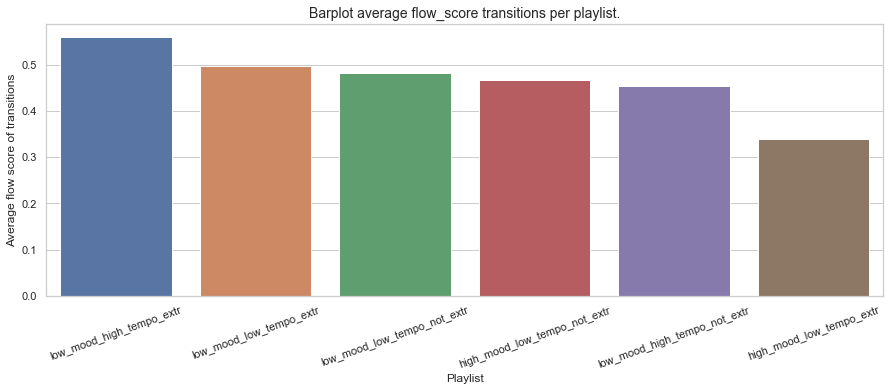

In [65]:
plt.figure(figsize=(15,5))
plt.title("Barplot average flow_score transitions per playlist.", fontsize = 14)
g=sns.barplot(x='playlist', y = 'mean', data = df_statistics_flow_score_playlist.sort_values(by='mean', ascending=False))
g.set_xticklabels(g.get_xticklabels(), rotation=20)
plt.ylabel("Average flow score of transitions")
plt.xlabel("Playlist")


Text(0,0.5,'Playlist\n')

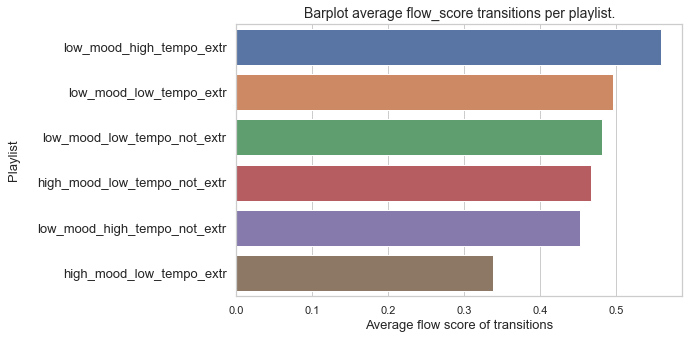

In [74]:
plt.figure(figsize=(8,5))
plt.title("Barplot average flow_score transitions per playlist.", fontsize = 14)
g=sns.barplot(y='playlist', x = 'mean', data = df_statistics_flow_score_playlist.sort_values(by='mean', ascending=False))
g.set_yticklabels(g.get_yticklabels(), fontsize = 13)
plt.xlabel("Average flow score of transitions", fontsize = 13)
plt.ylabel("Playlist\n", fontsize = 13)


Text(0.5,0,'Playlist')

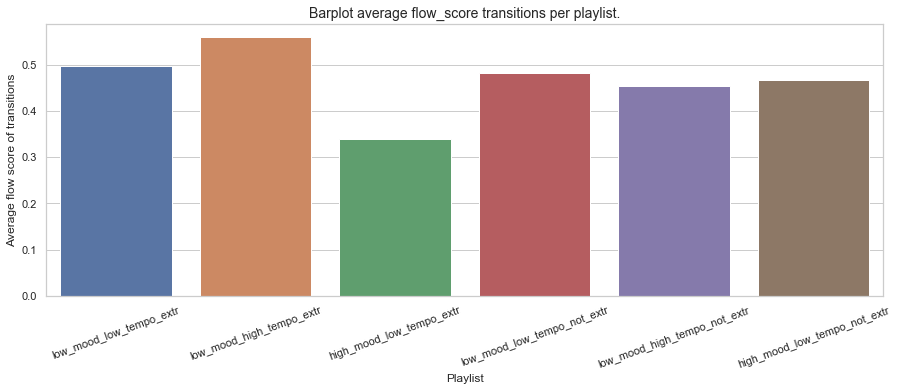

In [63]:
plt.figure(figsize=(15,5))
plt.title("Barplot average flow_score transitions per playlist.", fontsize = 14)
g=sns.barplot(x='playlist', y = 'mean', data = df_statistics_flow_score_playlist.sort_values(by='mean', ascending=False), 
              order = list_playlists)
g.set_xticklabels(g.get_xticklabels(), rotation=20)
plt.ylabel("Average flow score of transitions")
plt.xlabel("Playlist")

In [77]:
to_order = df_statistics_flow_score_playlist.sort_values(by='mean', ascending=False)['playlist']

Text(6.8,0.5,'Flow score of transitions in a playlist')

<Figure size 720x360 with 0 Axes>

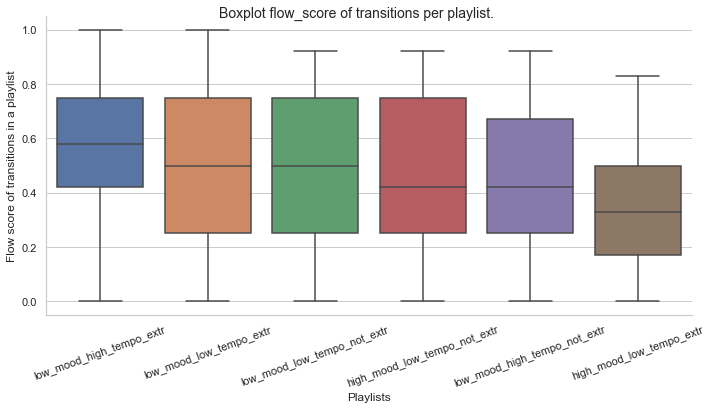

In [83]:
plt.figure(figsize=(10,5))
g = sns.catplot(x="playlist", y="flow_score", kind="box", height = 5, data=df_flow, aspect=2,order = to_order)
g.set_xticklabels(rotation=20)
g.fig.suptitle("Boxplot flow_score of transitions per playlist.", fontsize = 14)
plt.xlabel('Playlists')
plt.ylabel('Flow score of transitions in a playlist')

Text(0.5,6.8,'Flow score of transitions in a playlist')

<Figure size 720x360 with 0 Axes>

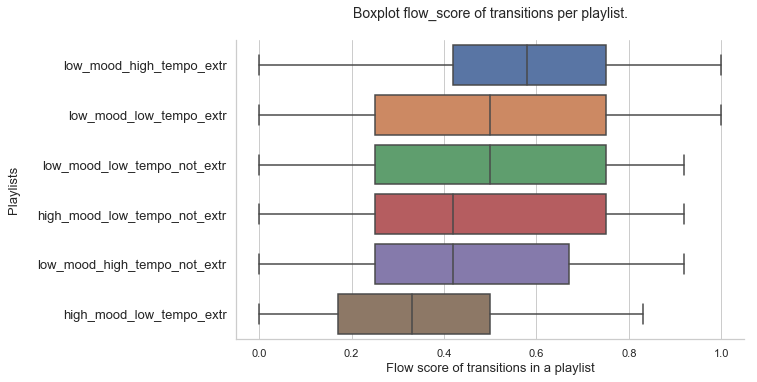

In [92]:
plt.figure(figsize=(10,5))
g = sns.catplot(y="playlist", x="flow_score", kind="box", height = 5, data=df_flow, aspect=2,order = to_order)
g.set_yticklabels(fontsize = 13)
plt.title("Boxplot flow_score of transitions per playlist.\n", fontsize = 14)
plt.ylabel('Playlists\n',fontsize = 13)
plt.xlabel('Flow score of transitions in a playlist',fontsize = 13)

In [79]:
df_flow.flow_score[df_flow.playlist=='low_mood_low_tempo_extr'].describe()

count    162.000000
mean       0.496358
std        0.279204
min        0.000000
25%        0.250000
50%        0.500000
75%        0.750000
max        1.000000
Name: flow_score, dtype: float64

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Playlists')

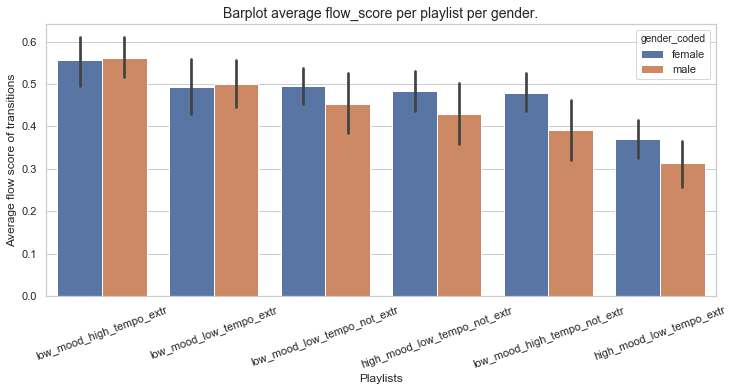

In [80]:
plt.figure(figsize=(12,5))
plt.title("Barplot average flow_score per playlist per gender.", fontsize = 14)
ax=sns.barplot(x='playlist', y = 'flow_score', hue = 'gender_coded', data = df_flow, order = to_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.ylabel("Average flow score of transitions")
plt.xlabel('Playlists')

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Playlists\n')

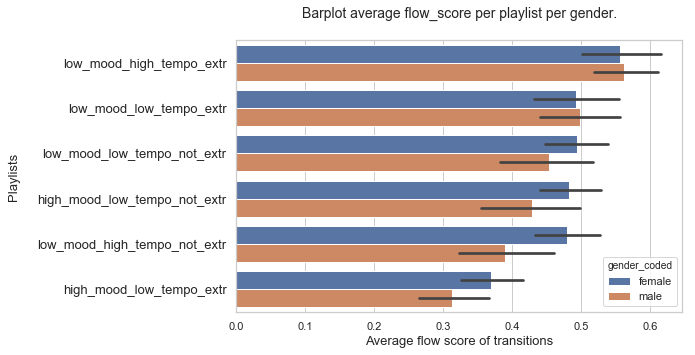

In [96]:
plt.figure(figsize=(8,5))
plt.title("Barplot average flow_score per playlist per gender.\n", fontsize = 14)
ax=sns.barplot(y='playlist', x = 'flow_score', hue = 'gender_coded', data = df_flow, order = to_order)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 13)
plt.xlabel("Average flow score of transitions", fontsize = 13)
plt.ylabel('Playlists\n', fontsize = 13)

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Playlists')

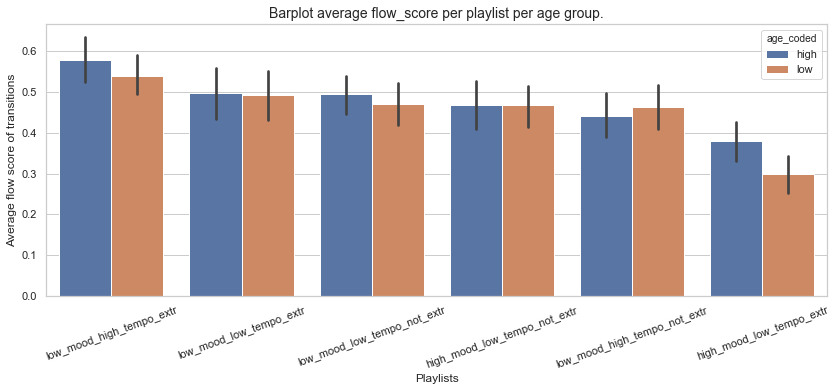

In [81]:
plt.figure(figsize=(14,5))
plt.title("Barplot average flow_score per playlist per age group.", fontsize = 14)
ax = sns.barplot(x='playlist', y = 'flow_score', hue = 'age_coded', data = df_flow, order = to_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
plt.ylabel("Average flow score of transitions")
plt.xlabel('Playlists')

C:\Users\s178288\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Playlists\n')

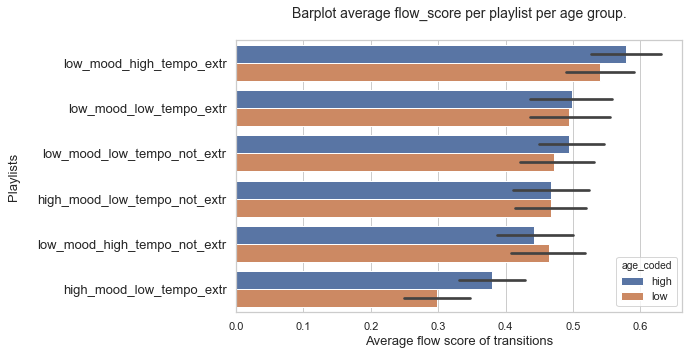

In [98]:
plt.figure(figsize=(8,5))
plt.title("Barplot average flow_score per playlist per age group.\n", fontsize = 14)
ax = sns.barplot(y='playlist', x = 'flow_score', hue = 'age_coded', data = df_flow, order = to_order)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 13)
plt.xlabel("Average flow score of transitions", fontsize = 13)
plt.ylabel('Playlists\n', fontsize = 13)

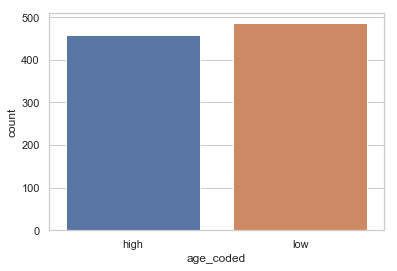

In [82]:
sns.countplot(df_flow.age_coded)